In [15]:
try:
    import Image
except ImportError:
    from PIL import Image
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

%matplotlib inline

import os

In [18]:
IMAGES_PATH = '/Users/sorrosn/Desktop/ocr_images/'

X = []
y = []

mosaic_images_path = f"{IMAGES_PATH}/mosaic/"
for img_name in os.listdir(mosaic_images_path):
    img_path = f"{mosaic_images_path}/{img_name}"
    img = Image.open(img_path)
    img = img.rotate(90)
    img = img.resize((40, 30))
    
    X.append(np.asarray(img))
    y.append(1)

non_mosaic_images_path = f"{IMAGES_PATH}/mosaic/"
for img_name in os.listdir(non_mosaic_images_path):
    img_path = f"{non_mosaic_images_path}/{img_name}"
    img = Image.open(img_path)
    img = img.rotate(90)
    img = img.resize((40, 30))
    
    X.append(np.asarray(img))
    y.append(0)

X = np.array(X)
y = np.array(y)

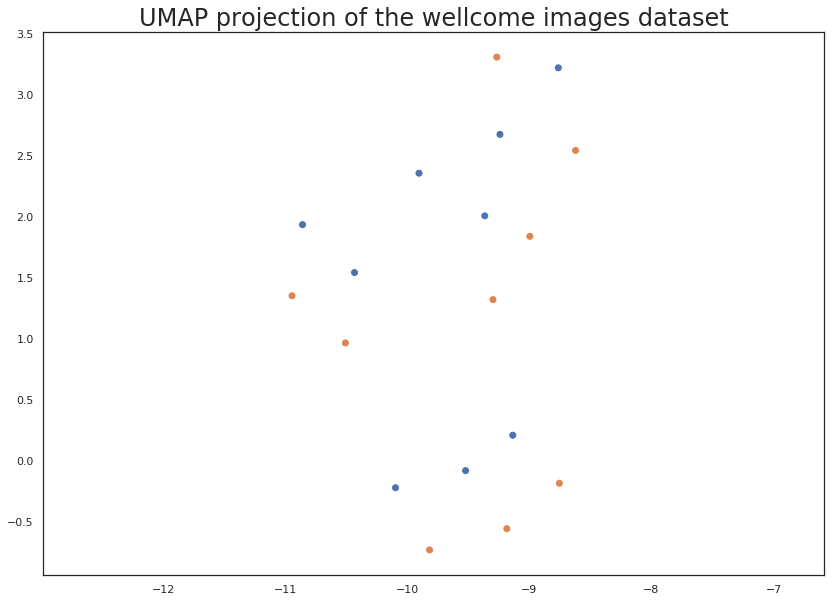

In [23]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

embedding = umap.UMAP().fit_transform(X.reshape((18, 30*40*3)))

plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the wellcome images dataset', fontsize=24);